# **Python Customer Segmentation & Clustering**

In [1]:
# import necesssary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the data
mall_df = pd.read_csv("C:/Users/Michael/Desktop/Masongo Projects/Customer Segmentation Project/Mall_Customers.csv")
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# check for missing values
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# change the data type for 'Gender' to category
mall_df["Gender"] = mall_df["Gender"].astype("category")

In [5]:
# confirm the change
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Gender                  200 non-null    category
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 6.7 KB


## **Univariate Analysis**

In [6]:
# Descriptive statictics: 5-number summary
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


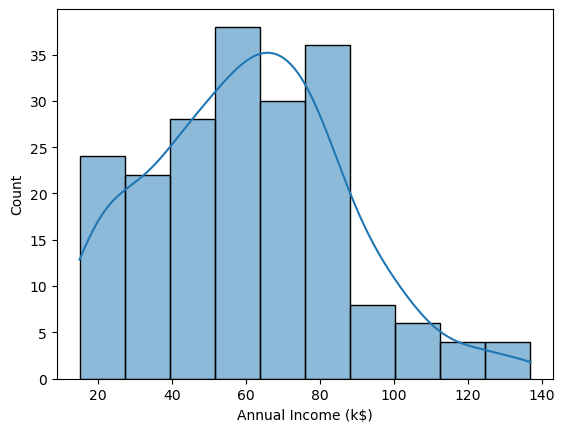

In [7]:
# check for outliers
sns.histplot(mall_df["Annual Income (k$)"], kde=True);

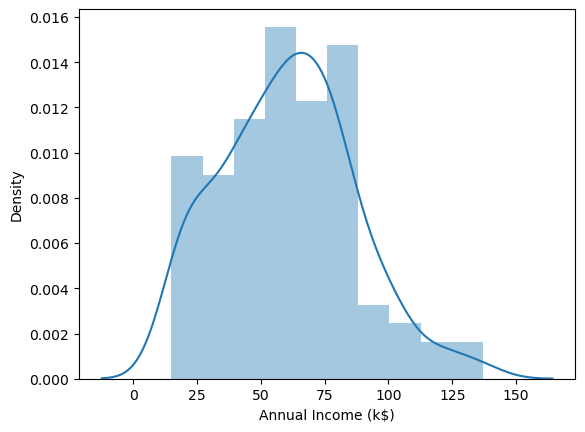

In [8]:
# check for outliers
sns.distplot(mall_df["Annual Income (k$)"]);

In [9]:
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

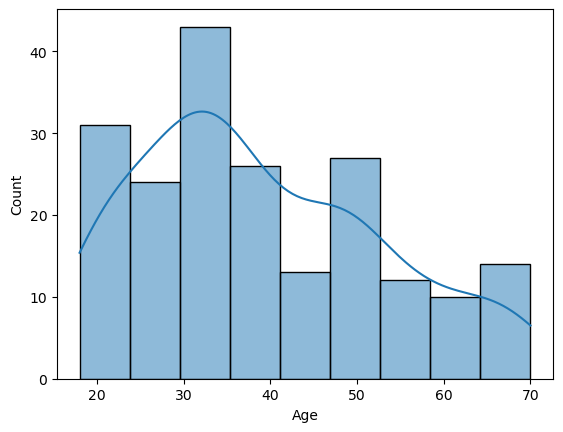

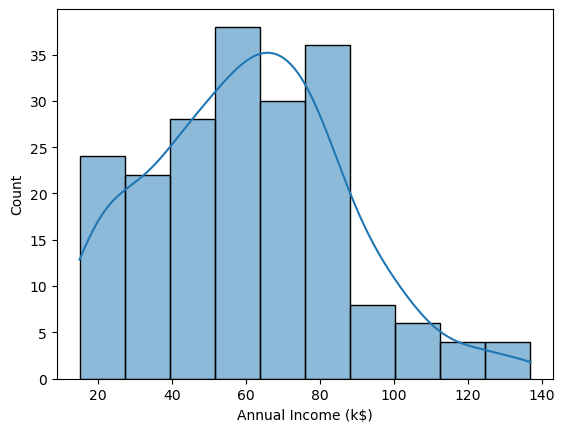

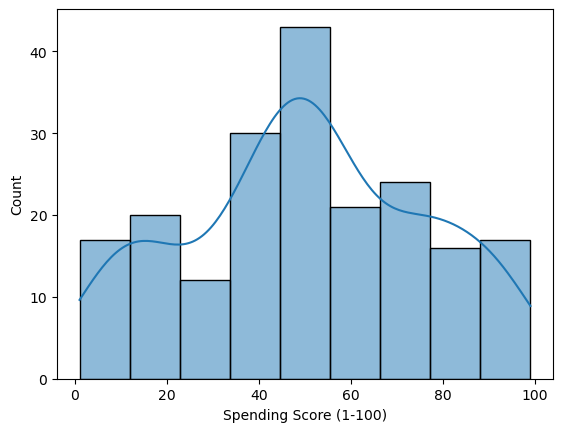

In [10]:
# select the numerical columns
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# plot the histograms
for i in columns:
    plt.figure()
    sns.histplot(mall_df[i], kde=True)  # kde=True adds the KDE plot
    plt.show()

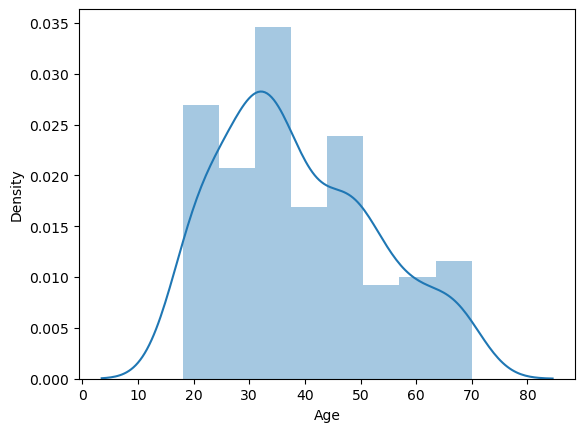

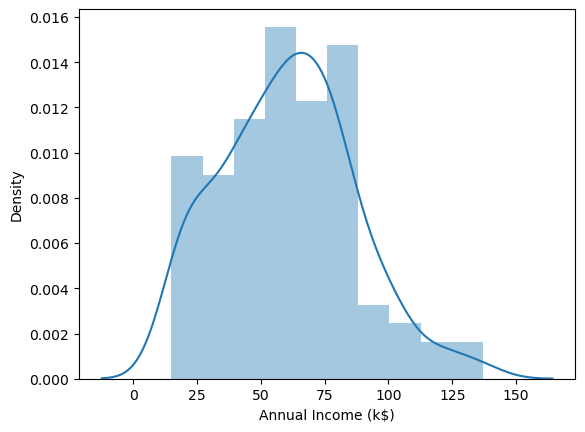

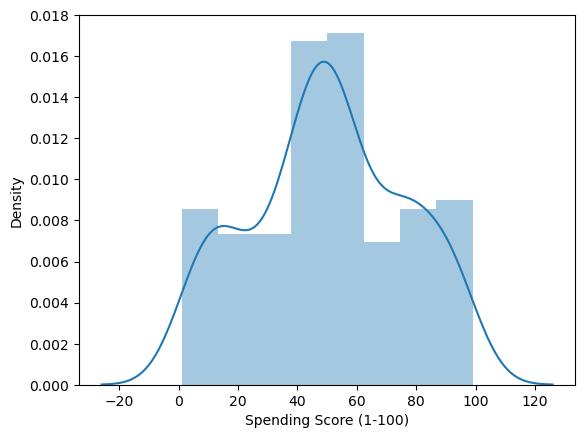

In [11]:
# select the numerical columns
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# plot the histograms
for i in columns:
    plt.figure()
    sns.distplot(mall_df[i])

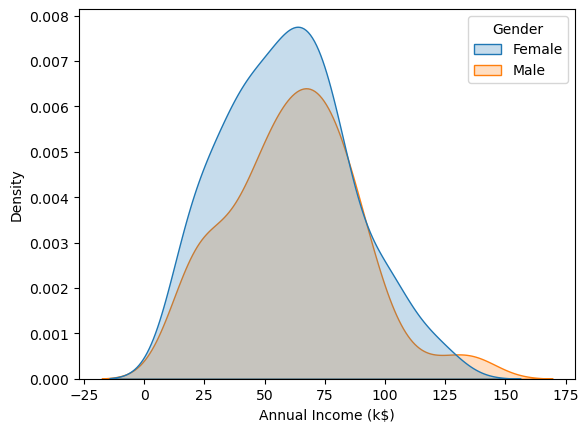

In [12]:
# check for outliers
sns.kdeplot(data = mall_df, x="Annual Income (k$)", hue="Gender", fill=True);

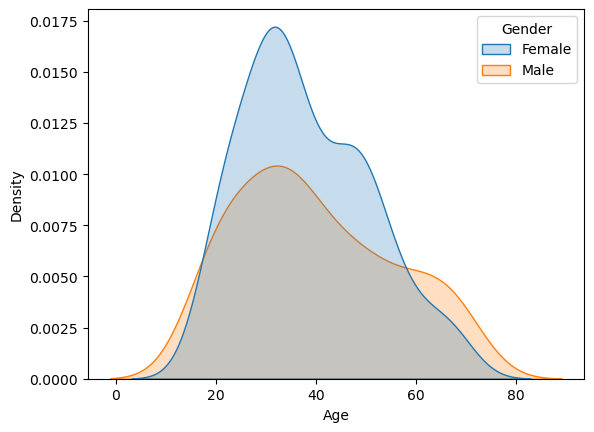

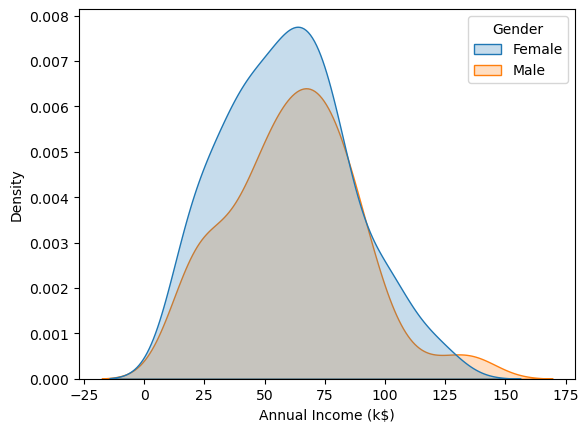

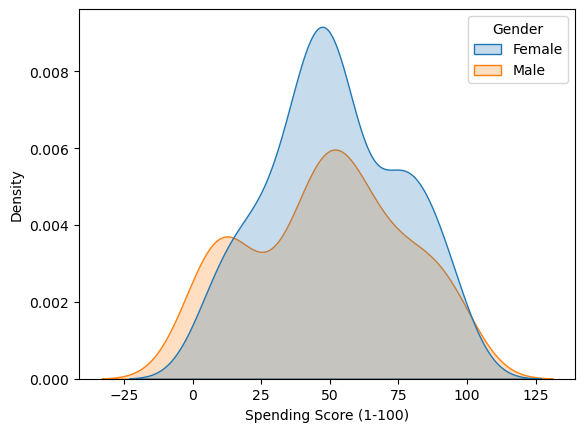

In [13]:
for i in columns:
    plt.figure()
    sns.kdeplot(data = mall_df, x=i, hue="Gender", fill=True)

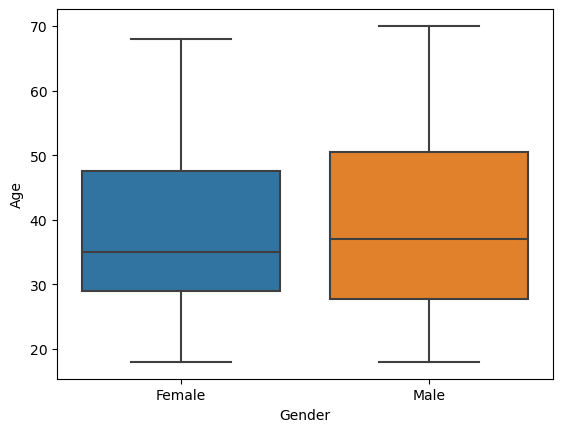

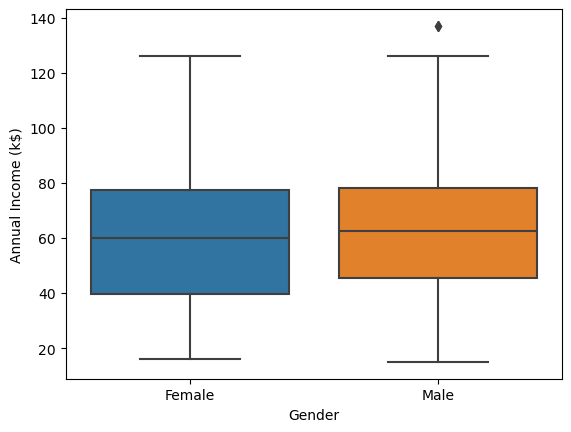

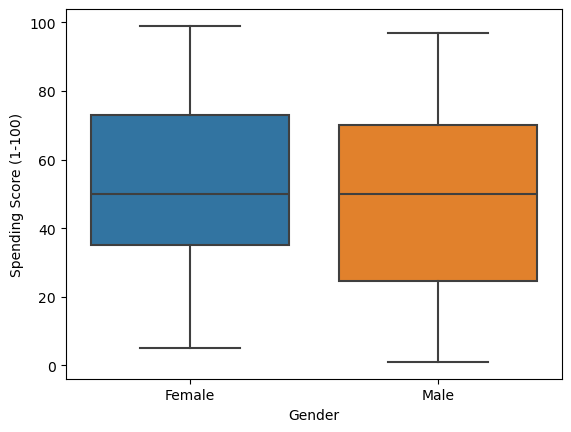

In [14]:
# plot boxplots to check for outliers
for i in columns:
    plt.figure()
    sns.boxplot(data = mall_df, x="Gender", y=mall_df[i])

In [15]:
mall_df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [16]:
(mall_df["Gender"].value_counts(normalize=True) * 100).apply(lambda x: str(round(x, 1)) + " %")

Female    56.0 %
Male      44.0 %
Name: Gender, dtype: object

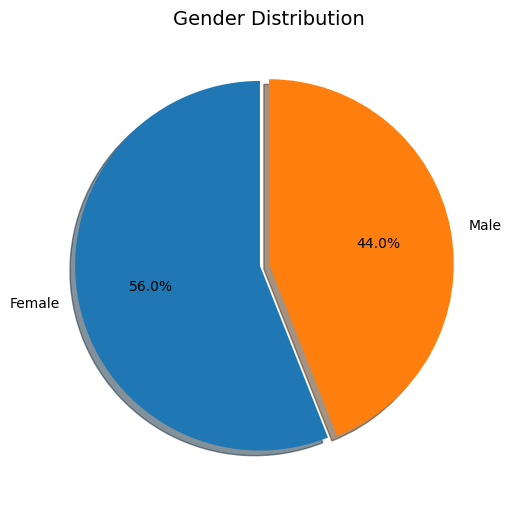

In [17]:
# Calculate the counts for each gender
gender_counts = mall_df["Gender"].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(
    gender_counts, 
    labels=gender_counts.index,  # Use gender labels
    autopct="%1.1f%%",  # Display percentage composition
    startangle=90,  # Start the pie chart at 90 degrees
    #colors=["#66b3ff", "#ff9999"],  # Optional: Add custom colors
    explode=(0.05, 0),  # Optional: Slightly separate one slice
    shadow=True  # Optional: Add shadow for better visualization
)

# Add a title
plt.title("Gender Distribution", fontsize=14)

# Show the plot
plt.show()

## **Bivariate Analysis**

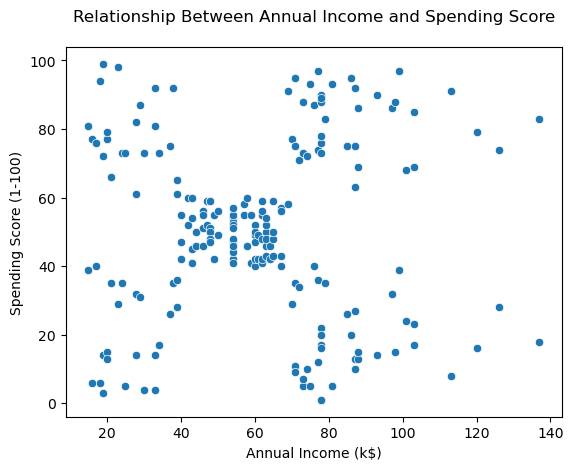

In [18]:
# Create a scatterplot Annual Income against Spending Score
sns.scatterplot(data=mall_df, x="Annual Income (k$)", y="Spending Score (1-100)")

# Add a title
plt.title("Relationship Between Annual Income and Spending Score\n", fontsize=12)

# Show the plot
plt.show()

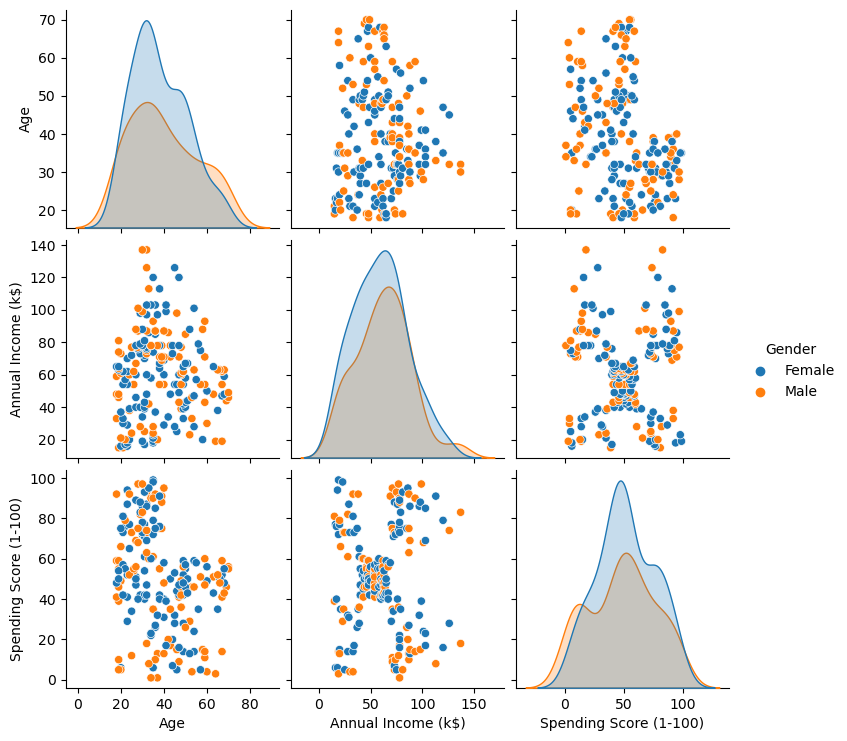

In [19]:
# Create a pairplot for each pair of columns based on 'Gender'
sns.pairplot(mall_df.drop("CustomerID", axis=1), hue="Gender", hue_order=["Female", "Male"]);

In [20]:
mall_df.groupby(["Gender"])[["Age", "Annual Income (k$)",
       "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [21]:
# correlation matrix
mall_df.drop(["CustomerID", "Gender"], axis=1).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


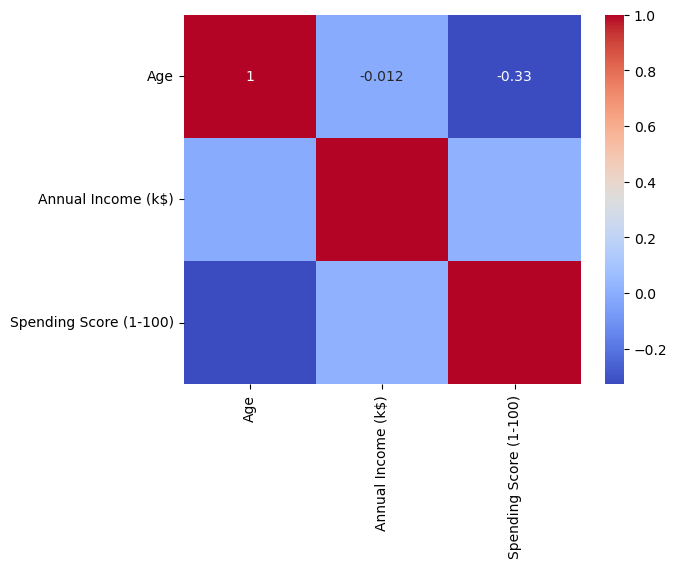

In [22]:
# plot the correlation matrix
sns.heatmap(mall_df.drop(["CustomerID", "Gender"], axis=1).corr(), cmap="coolwarm", annot=True, annot_kws={"size": 10});

## **Clustering - Univariate, Bivariate, and Multivariate**

### 1. Univariate Clustering

In [23]:
# KMeans univariate clustering
inertia_scores = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i)
    clustering.fit(mall_df[["Annual Income (k$)"]])
    inertia_scores.append(clustering.inertia_)

In [24]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 4002.194577352473,
 2870.389589169001,
 2168.4787157287155,
 1762.9541125541127]

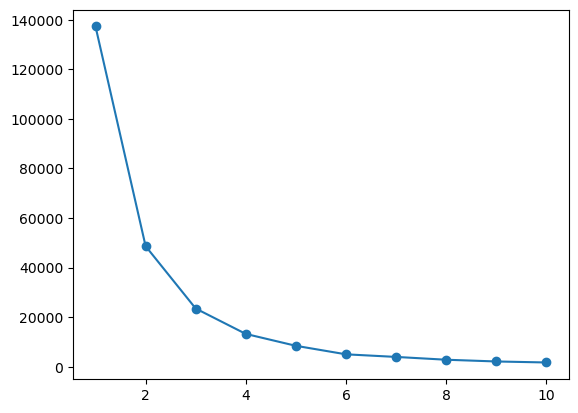

In [25]:
# plot the inertia scores against the number of clusters
plt.plot(range(1, 11), inertia_scores, marker="o");

In [26]:
# Selecting the number features for univariate clustering based on the elbow method
clustering_1 = KMeans(n_clusters=3)

In [27]:
clustering_1.fit(mall_df[["Annual Income (k$)"]])

KMeans(n_clusters=3)

In [28]:
clustering_1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [29]:
mall_df["Income Cluster"] = clustering_1.labels_
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [30]:
mall_df["Income Cluster"].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [31]:
clustering_1.inertia_

23517.330930930926

In [32]:
mall_df.groupby("Income Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


### 2. Bivariate Clustering

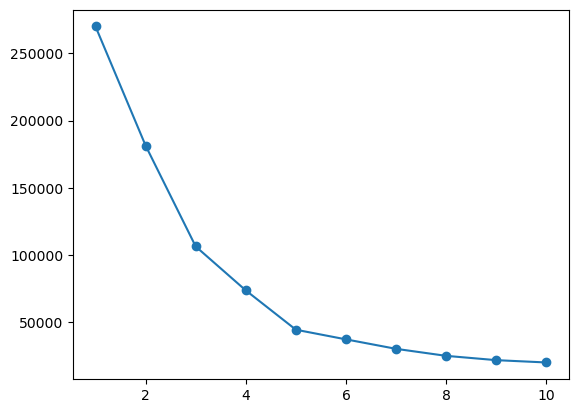

In [33]:
# KMeans bivariate clustering
inertia_scores_2 = []
for i in range(1, 11):
    clustering_2 = KMeans(n_clusters=i)
    clustering_2.fit(mall_df[["Annual Income (k$)", "Spending Score (1-100)"]])
    inertia_scores_2.append(clustering_2.inertia_)

plt.plot(range(1, 11), inertia_scores_2, marker="o");

In [34]:
# Selecting the number features for bivariate clustering based on the elbow method
clustering_2 = KMeans(n_clusters=5)
clustering_2.fit(mall_df[["Annual Income (k$)", "Spending Score (1-100)"]])
mall_df["Spending and Income Cluster"] = clustering_2.labels_
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,4


In [35]:
# centroids
centers = pd.DataFrame(clustering_2.cluster_centers_, columns=["Annual Income (k$)", "Spending Score (1-100)"])
centers

,Annual Income (k$),Spending Score (1-100)
0,25.727273,79.363636
1,55.296296,49.518519
2,86.538462,82.128205
3,88.200000,17.114286
4,26.304348,20.913043


In [36]:
centers.to_csv("kmeans_bivariate_clustering_centroids.csv", index=False)

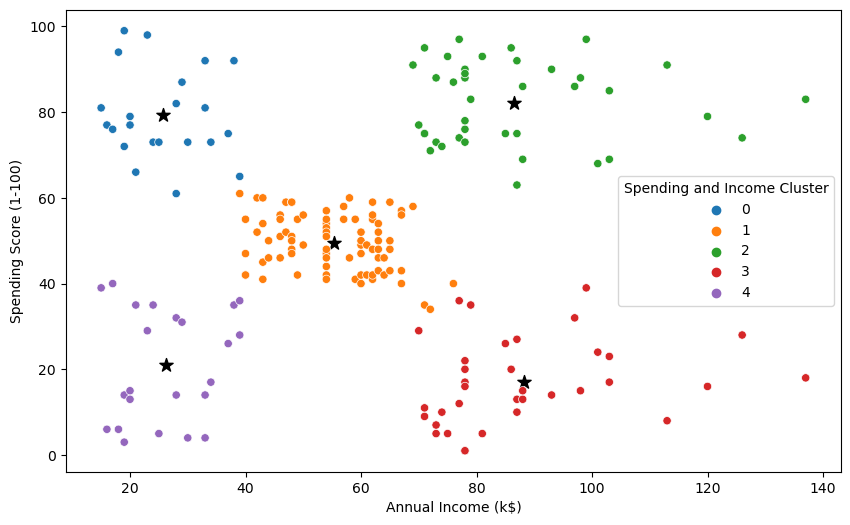

In [37]:
# Create a scatterplot of Annual Income against Spending Score

plt.figure(figsize=(10, 6))
plt.scatter(centers["Annual Income (k$)"], centers["Spending Score (1-100)"], color="black", marker="*", s=100)
sns.scatterplot(data=mall_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Spending and Income Cluster", palette="tab10")
plt.savefig("Bivariate Clustering.png");  # saves the plot as a .png file

In [38]:
pd.crosstab(mall_df["Spending and Income Cluster"], mall_df["Gender"])

Gender,Female,Male
Spending and Income Cluster,,
0,13,9
1,48,33
2,21,18
3,16,19
4,14,9


In [39]:
(pd.crosstab(mall_df["Spending and Income Cluster"], mall_df["Gender"], normalize="index") * 100).applymap("{:.1f} %".format)

Gender,Female,Male
Spending and Income Cluster,,
0,59.1 %,40.9 %
1,59.3 %,40.7 %
2,53.8 %,46.2 %
3,45.7 %,54.3 %
4,60.9 %,39.1 %


In [40]:
mall_df.groupby("Spending and Income Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [41]:
# save the data
mall_df.to_csv("bivariate_mall_df.csv", index=False)

### 3. Mulivariate Clustering 

In [42]:
# initialize the StandardScaler
scaler = StandardScaler()

In [43]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,4


In [44]:
# Handling categorical variables by creating dummy variables
mall_df_dummies = pd.get_dummies(mall_df, drop_first=True).astype(int)
mall_df_dummies.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,4,1
1,2,21,15,81,0,0,1
2,3,20,16,6,0,4,0
3,4,23,16,77,0,0,0
4,5,31,17,40,0,4,0


In [45]:
mall_df_dummies.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [46]:
# select the necessary columns and drop the unimportant ones
mall_df_dummies = mall_df_dummies[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Gender_Male"]]
mall_df_dummies.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [47]:
# Fit and transform the data
mall_df_dummies_scaled = pd.DataFrame(scaler.fit_transform(mall_df_dummies), columns=mall_df_dummies.columns)
mall_df_dummies_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


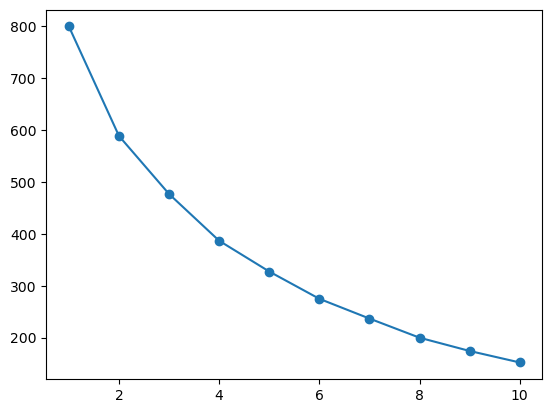

In [48]:
# KMeans multivariate clustering
inertia_scores_3 = []
for i in range(1, 11):
    clustering_3 = KMeans(n_clusters=i)
    clustering_3.fit(mall_df_dummies_scaled)
    inertia_scores_3.append(clustering_3.inertia_)

plt.plot(range(1, 11), inertia_scores_3, marker="o");

In [49]:
# Selecting the number features for multivariate clustering based on the elbow method
clustering_3 = KMeans(n_clusters=4)
clustering_3.fit(mall_df_dummies_scaled)
mall_df["Multivariate Cluster"] = clustering_3.labels_
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Multivariate Cluster
0,1,Male,19,15,39,0,4,3
1,2,Male,21,15,81,0,0,3
2,3,Female,20,16,6,0,4,0
3,4,Female,23,16,77,0,0,2
4,5,Female,31,17,40,0,4,0


In [50]:
pd.crosstab(mall_df["Multivariate Cluster"], mall_df["Gender"])

Gender,Female,Male
Multivariate Cluster,,
0,56,0
1,0,43
2,56,0
3,0,45


In [51]:
clustering_3.cluster_centers_

array([[ 0.64256818, -0.09498735, -0.59494042, -0.88640526],
       [ 0.98044981, -0.04445407, -0.72822025,  1.12815215],
       [-0.75047453, -0.00501655,  0.6979562 , -0.88640526],
       [-0.80259081,  0.16692764,  0.56765749,  1.12815215]])

In [52]:
# centroids
# inverse transforming the cluster centers since we scaled the data
centers_2 = pd.DataFrame(scaler.inverse_transform(clustering_3.cluster_centers_), columns=mall_df_dummies.columns)
centers_2

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,47.803571,58.071429,34.875000,-2.775558e-16
1,52.511628,59.395349,31.441860,1.000000e+00
2,28.392857,60.428571,68.178571,-2.775558e-16
3,27.666667,64.933333,64.822222,1.000000e+00


In [53]:
mall_df.groupby("Multivariate Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Multivariate Cluster,,,
0,47.803571,58.071429,34.875000
1,52.511628,59.395349,31.441860
2,28.392857,60.428571,68.178571
3,27.666667,64.933333,64.822222


In [54]:
mall_df_dummies = pd.get_dummies(mall_df, drop_first=True).astype(int)
mall_df_dummies["Multivariate Cluster"] = clustering_3.labels_

mall_df_dummies.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Multivariate Cluster,Gender_Male
0,1,19,15,39,0,4,3,1
1,2,21,15,81,0,0,3,1
2,3,20,16,6,0,4,0,0
3,4,23,16,77,0,0,2,0
4,5,31,17,40,0,4,0,0


In [55]:
mall_df_dummies.groupby(["Multivariate Cluster", "Gender_Male"])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,,Age,Annual Income (k$),Spending Score (1-100)
Multivariate Cluster,Gender_Male,,,
0,0,47.803571,58.071429,34.875000
1,1,52.511628,59.395349,31.441860
2,0,28.392857,60.428571,68.178571
3,1,27.666667,64.933333,64.822222


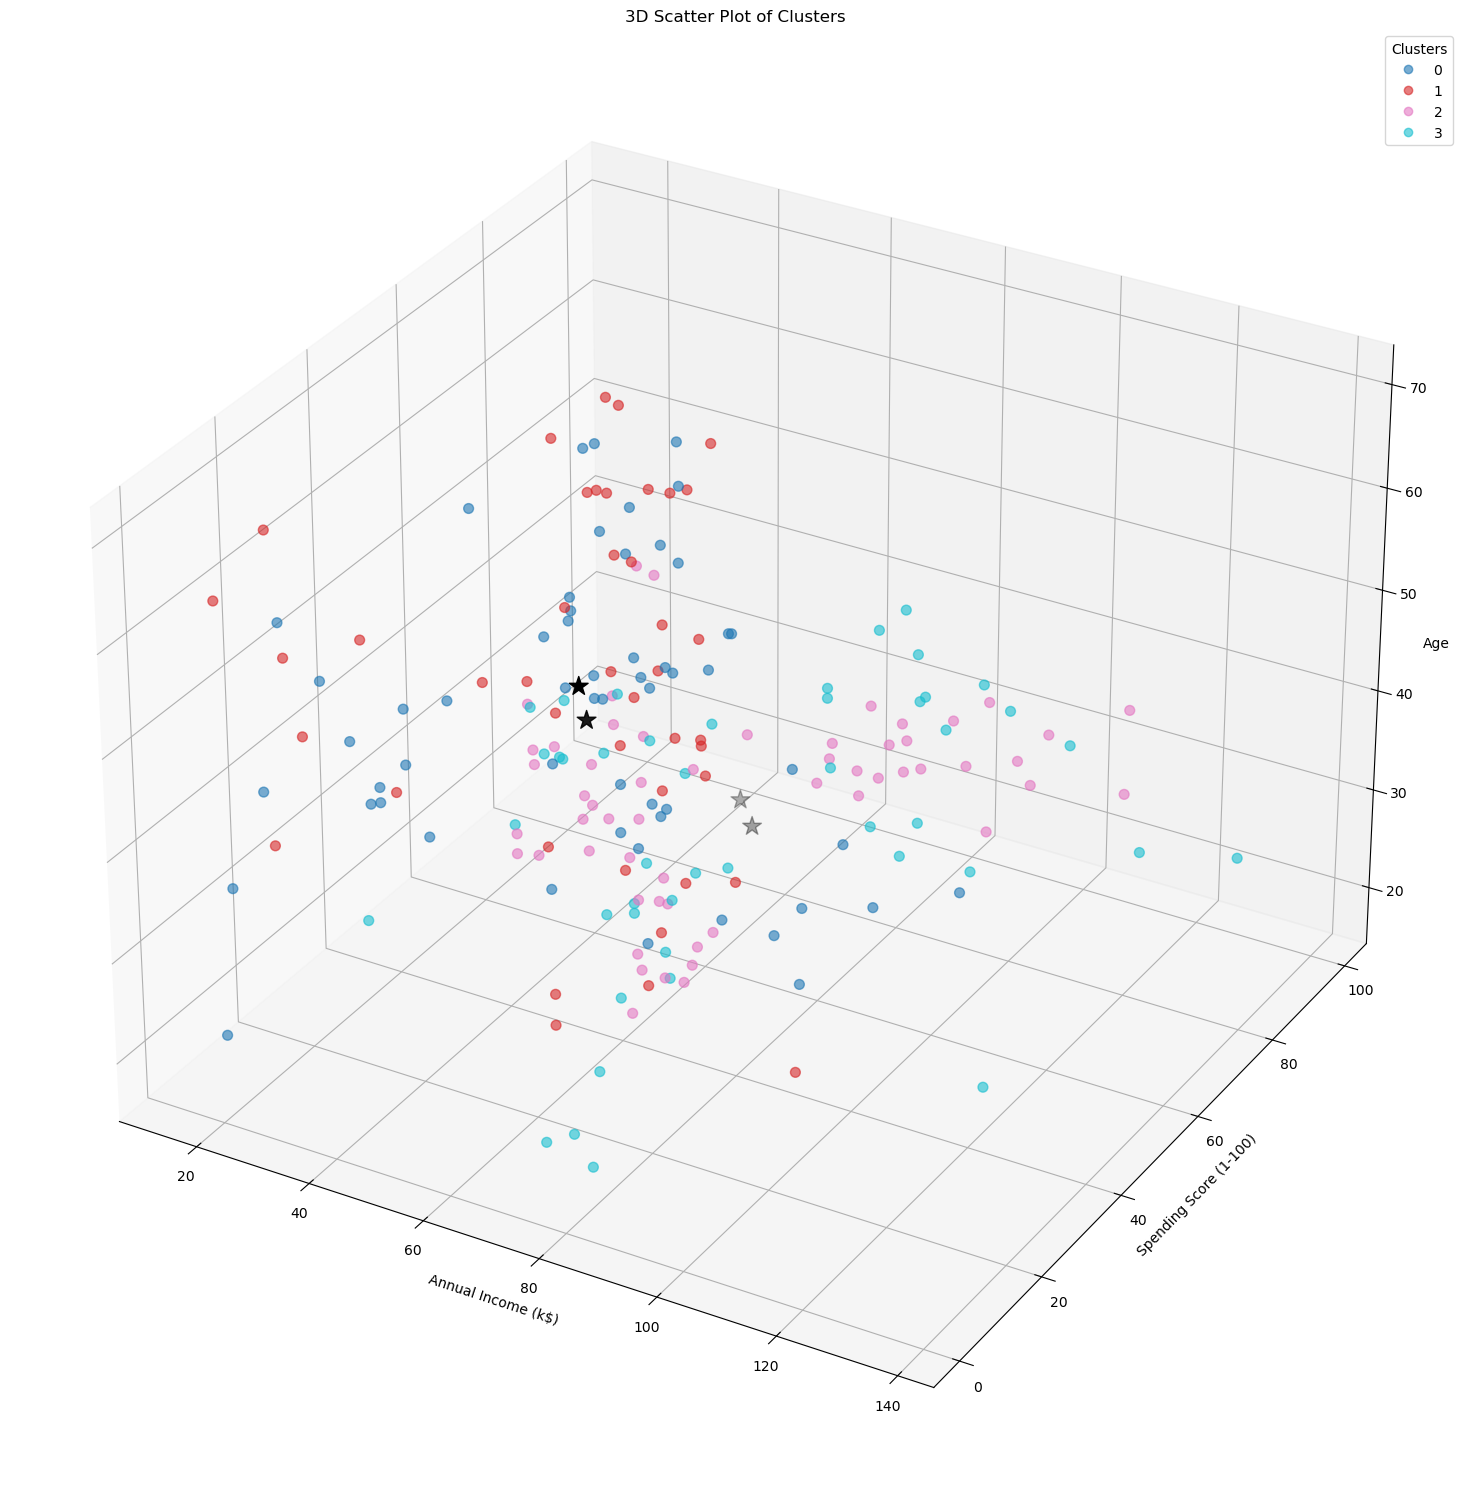

In [56]:
from mpl_toolkits.mplot3d import Axes3D

# Visualizing the clusters for the multivariate clustering

# Assuming `centers` contains cluster centroids and `mall_df` contains the original data
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection="3d")

# Plotting the cluster centroids
ax.scatter(
    centers_2["Annual Income (k$)"],
    centers_2["Spending Score (1-100)"],
    centers_2["Age"],
    color="black",
    marker="*",
    s=200,
    label="Centroids"
)

# Plotting the data points with cluster hues
scatter = ax.scatter(
    mall_df["Annual Income (k$)"],
    mall_df["Spending Score (1-100)"],
    mall_df["Age"],
    c=mall_df["Multivariate Cluster"],
    cmap="tab10",
    s=50,
    alpha=0.6
)

# Adding labels and legend
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
ax.set_zlabel("Age")
plt.title("3D Scatter Plot of Clusters")
plt.legend(*scatter.legend_elements(), title="Clusters")

# Adjusting layout to prevent clipping
plt.tight_layout()
fig.subplots_adjust(right=0.8)
plt.show()

In [57]:
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Multivariate Cluster
0,1,Male,19,15,39,0,4,3
1,2,Male,21,15,81,0,0,3
2,3,Female,20,16,6,0,4,0
3,4,Female,23,16,77,0,0,2
4,5,Female,31,17,40,0,4,0
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2,2
196,197,Female,45,126,28,1,3,0
197,198,Male,32,126,74,1,2,3
198,199,Male,32,137,18,1,3,3


In [58]:
# save the data
mall_df.to_csv("multivariate_mall_df.csv", index=False)